In [1]:
import io
import csv
import sys 
import math
import numpy as np
import pandas as pd

from bisect import bisect_left
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

maxInt = sys.maxsize
while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

from implementations_NB02 import*

In [4]:
#need to call the correct files for one day

#monday
#header_traj_1, all_lines_1 = read_traj_csv('data/monday_d8_0800_0830_OD_trajectories.csv')
#header_traj_2, all_lines_2 = read_traj_csv('data/monday_d8_0830_0900_OD_trajectories.csv')
#header_traj_3, all_lines_3 = read_traj_csv('data/monday_d8_0900_0930_OD_trajectories.csv')
#header_traj_4, all_lines_4 = read_traj_csv('data/monday_d8_0930_1000_OD_trajectories.csv')
#header_traj_5, all_lines_5 = read_traj_csv('data/monday_d8_1000_1030_OD_trajectories.csv')

#tuesday
#header_traj_1, all_lines_1 = read_traj_csv('data/tuesday_d8_0800_0830_OD_trajectories.csv')
#header_traj_2, all_lines_2 = read_traj_csv('data/tuesday_d8_0830_0900_OD_trajectories.csv')
#header_traj_3, all_lines_3 = read_traj_csv('data/tuesday_d8_0900_0930_OD_trajectories.csv')
#header_traj_4, all_lines_4 = read_traj_csv('data/tuesday_d8_0930_1000_OD_trajectories.csv')
#header_traj_5, all_lines_5 = read_traj_csv('data/tuesday_d8_1000_1030_OD_trajectories.csv')

#wednesday
#header_traj_1, all_lines_1 = read_traj_csv('data/wednesday_d8_0830_0900_OD_trajectories.csv')
#header_traj_2_01, all_lines_2_01 = read_traj_csv('data/wednesday_d8_0900_0930_OD_trajectories_01.csv')
#header_traj_2_02, all_lines_2_02 = read_traj_csv('data/wednesday_d8_0900_0930_OD_trajectories_02.csv')
#all_lines_2 = all_lines_2_01+all_lines_2_02
#header_traj_3_01, all_lines_3_01 = read_traj_csv('data/wednesday_d8_0930_1000_OD_trajectories_01.csv')
#header_traj_3_02, all_lines_3_02 = read_traj_csv('data/wednesday_d8_0930_1000_OD_trajectories_02.csv')
#all_lines_3 = all_lines_3_01+all_lines_3_02
#header_traj_4_01, all_lines_4_01 = read_traj_csv('data/wednesday_d8_1000_1030_OD_trajectories_01.csv')
#header_traj_4_02, all_lines_4_02 = read_traj_csv('data/wednesday_d8_1000_1030_OD_trajectories_02.csv')
#all_lines_4 = all_lines_4_01+all_lines_4_02
#header_traj_5, all_lines_5 = read_traj_csv('data/wednesday_d8_1030_1100_OD_trajectories.csv')

#thursday
header_traj_1, all_lines_1 = read_traj_csv('data/thursday_d8_0800_0830_OD_trajectories.csv')
header_traj_2, all_lines_2 = read_traj_csv('data/thursday_d8_0830_0900_OD_trajectories.csv')
header_traj_3, all_lines_3 = read_traj_csv('data/thursday_d8_0900_0930_OD_trajectories.csv')
header_traj_4, all_lines_4 = read_traj_csv('data/thursday_d8_0930_1000_OD_trajectories.csv')
header_traj_5_01, all_lines_5_01 = read_traj_csv('data/thursday_d8_1000_1030_OD_trajectories_01.csv')
header_traj_5_02, all_lines_5_02 = read_traj_csv('data/thursday_d8_1000_1030_OD_trajectories_02.csv')
all_lines_5 = all_lines_5_01 + all_lines_5_02

all_lines = all_lines_1 + all_lines_2 + all_lines_3 + all_lines_4 + all_lines_5
update_track_id(all_lines)

In [5]:
l1 = len(all_lines_1)
l2 = len(all_lines_2)
l3 = len(all_lines_3)
l4 = len(all_lines_4)
l5 = len(all_lines_5)

In [6]:
all_info_measured = list()
for i in range(len(all_lines)) :
    info_init, info_measured = infos_vehicule_i(all_lines, i)
    all_info_measured.append(info_measured)
len(all_info_measured)

for j in range(len(all_info_measured)):
    if j > l1-1 and j <= l1+l2-1 :
        all_info_measured[j][:,5] += 30*60
    if j > l1+l2-1 and j <= l1+l2+l3-1 :
        all_info_measured[j][:,5] += 60*60
    if j > l1+l2+l3-1 and j <= l1+l2+l3+l4-1:
        all_info_measured[j][:,5] += 90*60
    if j > l1+l2+l3+l4-1 :
        all_info_measured[j][:,5] += 120*60

In [7]:
def vehicle_data(vehicle_info):
    #getting speed and time
    speed = vehicle_info[:,2].astype(float)
    time = vehicle_info[:,5].astype(float)
    x, y = np.array(vehicle_info[:, 0]), np.array(vehicle_info[:, 1])
    x_0 = 740212.115
    y_0 = 4208365.717
    x0, y0 = np.full((len(x),), x_0), np.full((len(y),), y_0)
    dist = np.sqrt(((x-x0)**2+(y-y0)**2).astype(float))
    return np.array(dist), np.array(speed), np.array(time)

def locations(space, speed, time, all_t):
    idx_l = [bisect_left(time, t) -1 for t in all_t]
    locations_at_t = (all_t - time[idx_l]) * (speed[idx_l] / 3.6) + space[idx_l] #in meters
    return locations_at_t

def times(space, speed, time, all_loc):
    idx_l = [bisect_left(space, loc) - 1 for loc in all_loc]
    times_at_loc = (all_loc - space[idx_l]) / (speed[idx_l] / 3.6) + time[idx_l] #in seconds
    return times_at_loc

def plot_TS_diag(time, space, speed):
    '''
    Function to generate the time-space diagram for one vehicle; colour bar for speed variation
    
    Input:
    time         1D np.array; time instances where data is recorded for the specified vehicle
    space        1D np.array; instantaneous positions at the specified time
    speed        1D np.array; instantaneous speeds at the specified time
    
    Returns:
    Plot of one vehicle trajectory
    
    Colorbar reference: 
    https://scipy-cookbook.readthedocs.io/items/Matplotlib_MulticoloredLine.html
    '''
    points = np.array([time, space]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
    lc.set_array(speed)
    lc.set_linewidth(0.4)   
    plt.gca().add_collection(lc)
    
    return

def FD_points(q_all, k_all):
    '''
    Find four data points that are closest to the corners 
    defined by the max. and min. of the data points.
    
    Input:
    q_all        1D np.array; all flow data points from both stationary observers
    k_all        1D np.array; all density data points from both stationary observers
    
    Returns:
    points       2D np.array; shape=(4, 2). Four data points nearest to the corners
    '''   
    
    # corners of a rectangle
    
    bottom_left  = (0, 0)
    top_left     = (0, q_all.max())
    top_right    = (k_all.max(), q_all.max())
    bottom_right = (k_all.max(), 0)    
    
    # merge density and flow data
    
    data = np.array([k_all, q_all]).T
    
    points = np.zeros((4, 2))
    
    for i, corner in enumerate([bottom_left, top_left, top_right, bottom_right]):
        
        idx = np.argmin(np.linalg.norm(data - corner, axis=1))
        points[i,:] = data[idx,:]
        
    return points

def find_lane(vehicle_info, L) :
    space, speed, time = vehicle_data(vehicle_info)
    dist = space - L
    index = np.argmin(np.abs(dist))
    lane_x = vehicle_info[index, -1]
    if lane_x == "Lane Out" :
        return 0
    elif lane_x == "Lane In" : 
        return 0
    else :
        lane = int(lane_x[7:8])
        return lane

In [8]:
t_min = 1000
t_max = 0
d_min = 1e6
d_max = 0
for i in range(len(all_info_measured)):
    space, speed, time = vehicle_data(all_info_measured[i])
    
    if min(space) < d_min :
        d_min = min(space)
    if max(space) > d_max :
        d_max = max(space)
    if min(time) < t_min :
        t_min = min(time)
    if max(time) > t_max :
        t_max = max(time)
    if time.any() < 0 :
        print("Problem with sample", i, ", negative time" )

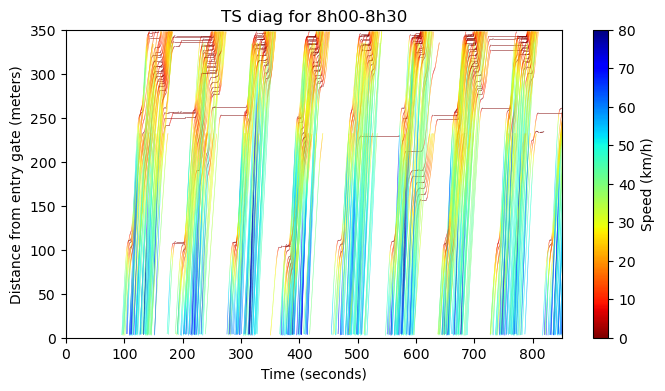

<Figure size 640x480 with 0 Axes>

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
for i in range(l1):
    space, speed, time = vehicle_data(all_info_measured[i])
    speed = speed.astype(float)
    plot_TS_diag(time, space, speed)

plt.xlim(0, 850)
plt.ylim(0, 350)
plt.title("TS diag for 8h00-8h30")
plt.xlabel('Time (seconds)')
plt.ylabel("Distance from entry gate (meters)")

# set colour bar with some empty lists

points = np.array([[0, 0, 0], [0, 0, 0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc_bar = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
fig.colorbar(lc_bar, ax=ax, label='Speed (km/h)')
plt.show()
#plt.savefig("plots/thursday/TSdiag0800_0830.jpg", dpi=300)

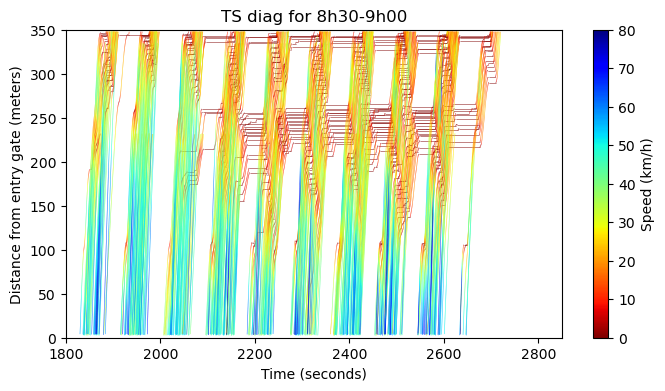

<Figure size 640x480 with 0 Axes>

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
for i in range(l1, l1+l2):
    space, speed, time = vehicle_data(all_info_measured[i])
    speed = speed.astype(float)
    plot_TS_diag(time, space, speed)

plt.xlim(1800, 2850)
plt.ylim(0, 350)
plt.title("TS diag for 8h30-9h00")
plt.xlabel('Time (seconds)')
plt.ylabel("Distance from entry gate (meters)")

points = np.array([[0, 0, 0], [0, 0, 0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc_bar = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
fig.colorbar(lc_bar, ax=ax, label='Speed (km/h)')
plt.show()
#plt.savefig("plots/thursday/TSdiag0830_0900.jpg", dpi=300)

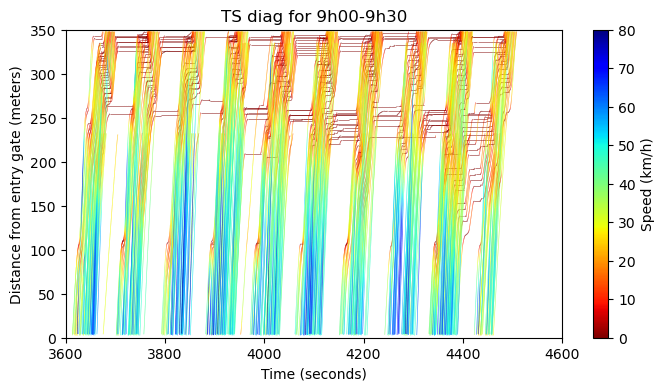

<Figure size 640x480 with 0 Axes>

In [11]:
fig, ax = plt.subplots(figsize=(8, 4))
for i in range(l1+l2, l1+l2+l3):
    space, speed, time = vehicle_data(all_info_measured[i])
    speed = speed.astype(float)
    plot_TS_diag(time, space, speed)

plt.xlim(3600, 4600)
plt.ylim(0, 350)
plt.title("TS diag for 9h00-9h30")
plt.xlabel('Time (seconds)')
plt.ylabel("Distance from entry gate (meters)")

points = np.array([[0, 0, 0], [0, 0, 0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc_bar = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
fig.colorbar(lc_bar, ax=ax, label='Speed (km/h)')
plt.show()
#plt.savefig("plots/thursday/TSdiag0900_0930.jpg", dpi=300)

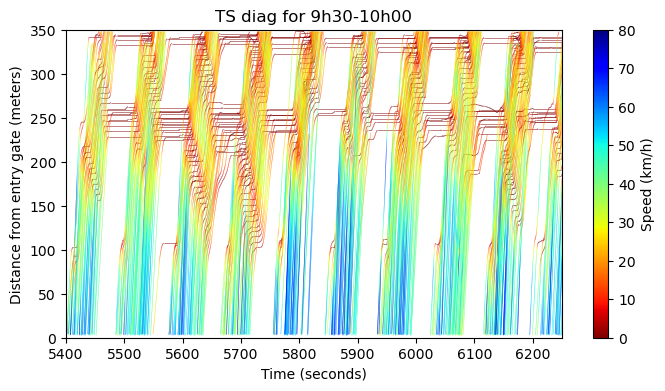

<Figure size 640x480 with 0 Axes>

In [12]:
fig, ax = plt.subplots(figsize=(8, 4))
for i in range(l1+l2+l3, l1+l2+l3+l4):
    space, speed, time = vehicle_data(all_info_measured[i])
    speed = speed.astype(float)
    plot_TS_diag(time, space, speed)

plt.xlim(5400, 6250)
plt.ylim(0, 350)
plt.title("TS diag for 9h30-10h00")
plt.xlabel('Time (seconds)')
plt.ylabel("Distance from entry gate (meters)")

points = np.array([[0, 0, 0], [0, 0, 0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc_bar = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
fig.colorbar(lc_bar, ax=ax, label='Speed (km/h)')
plt.show()
#plt.savefig("plots/thursday/TSdiag0930_1000.jpg", dpi=300)

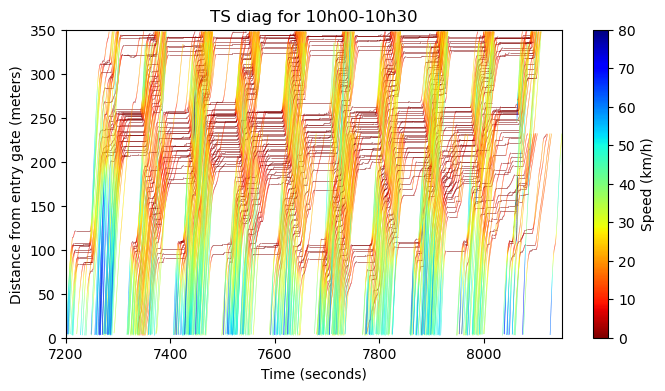

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
for i in range(l1+l2+l3+l4, l1+l2+l3+l4+l5):
    space, speed, time = vehicle_data(all_info_measured[i])
    speed = speed.astype(float)
    plot_TS_diag(time, space, speed)

plt.xlim(7200, t_max)
plt.ylim(0, 350)
plt.title("TS diag for 10h00-10h30")
plt.xlabel('Time (seconds)')
plt.ylabel("Distance from entry gate (meters)")

points = np.array([[0, 0, 0], [0, 0, 0]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc_bar = LineCollection(segments, cmap=plt.get_cmap('jet_r'), norm=plt.Normalize(0, 80))
fig.colorbar(lc_bar, ax=ax, label='Speed (km/h)')
plt.show()
#plt.savefig("plots/thursday/TSdiag1000_1030.jpg", dpi=300)

In [14]:
# parameters
dt = 10     # time between observations [s]
t_start = 0         # start time of observation [s]
t_end = t_max         # end time of obsevation [s]
T = t_end - t_start # [s]


l = 150  #distance between the 2 observers [m]
L_A = 300   # location of observer A [m] #should be 235 for Tuesday
L_B = L_A - l  # location of observer B [m]

all_times = np.linspace(0, T, int(T/dt)+1)

num_of_files = len(all_info_measured)

In [15]:
len(all_times)

815

In [16]:
n_A_1 = np.zeros(int(T/dt)+1) 
n_A_2 = np.zeros(int(T/dt)+1) 
n_A_3 = np.zeros(int(T/dt)+1)
n_B_1 = np.zeros(int(T/dt)+1)
n_B_2 = np.zeros(int(T/dt)+1)
n_B_3 = np.zeros(int(T/dt)+1) # n_X[i] refers to the vehicle count between t=i*dt and t=(i+1)*dt

q_A_1 = np.zeros(int(T/dt)+1) 
q_A_2 = np.zeros(int(T/dt)+1)
q_A_3 = np.zeros(int(T/dt)+1)
q_B_1 = np.zeros(int(T/dt)+1)
q_B_2 = np.zeros(int(T/dt)+1)
q_B_3 = np.zeros(int(T/dt)+1) # this will receive the corresponding flows


for i in range(num_of_files):
    
    space, speed, time = vehicle_data(all_info_measured[i])
    
    time_A, time_B = times(space, speed, time, [L_A, L_B])
    
    # add to vehicle count in the corresponding time intervals
    lane_in_A = find_lane(all_info_measured[i], L_A)
    lane_in_B = find_lane(all_info_measured[i], L_B)
    
    for j in range(len(all_times)):
        if lane_in_A == 1 and j*dt <= time_A and (j+1)*dt > time_A :
            n_A_1[j] += 1
        elif lane_in_A == 2 and j*dt <= time_A and (j+1)*dt > time_A :
            n_A_2[j] += 1
        elif lane_in_A == 3 and j*dt <= time_A and (j+1)*dt > time_A :
            n_A_3[j] += 1
            
        if lane_in_B == 1 and j*dt <= time_B and (j+1)*dt > time_B :
            n_B_1[j] += 1
        elif lane_in_B == 2 and j*dt <= time_B and (j+1)*dt > time_B :
            n_B_2[j] += 1
        elif lane_in_B == 3 and j*dt <= time_B and (j+1)*dt > time_B :
            n_B_3[j] += 1

q_A_1 = n_A_1/dt*60
q_A_2 = n_A_2/dt*60
q_A_3 = n_A_3/dt*60 
q_B_1 = n_B_1/dt*60
q_B_2 = n_B_2/dt*60
q_B_3 = n_B_3/dt*60 # convert into veh/min

In [17]:
L=50 #distance to measure density
x_A_1 = np.zeros(int(T/dt)+1)
x_A_2 = np.zeros(int(T/dt)+1)
x_A_3 = np.zeros(int(T/dt)+1)
# number of vehicles inside a 50m segment, every dt seconds
x_B_1 = np.zeros(int(T/dt)+1)
x_B_2 = np.zeros(int(T/dt)+1) 
x_B_3 = np.zeros(int(T/dt)+1) 
# x_Y[i] refers to the vehicle count between t=i*dt and t=(i+1)*dt

for i in range(num_of_files):

    space, speed, time = vehicle_data(all_info_measured[i])
    
    time_A, time_B = times(space, speed, time, [L_A, L_B])
    
    time_A_in, time_B_in = times(space, speed, time, [L_A-L, L_B-L])
    
    lane_in_A = find_lane(all_info_measured[i], L_A-L/2)
    lane_in_B = find_lane(all_info_measured[i], L_B-L/2)
    
    # count vehicle in this time slot if the midpoint of the time slot is included
    
    for j in range(len(all_times)):
        
        if lane_in_A == 1 and j*dt+0.5*dt <= time_A and j*dt+0.5*dt >= time_A_in:
            x_A_1[j] += 1
        elif lane_in_A == 2 and j*dt+0.5*dt <= time_A and j*dt+0.5*dt >= time_A_in:
            x_A_2[j] += 1
        elif lane_in_A == 3 and j*dt+0.5*dt <= time_A and j*dt+0.5*dt >= time_A_in:
            x_A_3[j] += 1
        
        if lane_in_B == 1 and j*dt+0.5*dt <= time_B and j*dt+0.5*dt >= time_B_in:
            x_B_1[j] += 1  
        elif lane_in_B == 2 and j*dt+0.5*dt <= time_B and j*dt+0.5*dt >= time_B_in:
            x_B_2[j] += 1 
        elif lane_in_B == 3 and j*dt+0.5*dt <= time_B and j*dt+0.5*dt >= time_B_in:
            x_B_3[j] += 1

k_A_1 = x_A_1/L
k_A_2 = x_A_2/L
k_A_3 = x_A_3/L
k_B_1 = x_B_1/L
k_B_2 = x_B_2/L
k_B_3 = x_B_3/L #convert to density

In [18]:
q_all_1 = None
q_all_2 = None
q_all_3 = None
k_all_1 = None
k_all_2 = None
k_all_3 = None

q_all_1 = np.ravel([q_A_1, q_B_1])
q_all_2 = np.ravel([q_A_2, q_B_2])
q_all_3 = np.ravel([q_A_3, q_B_3])
k_all_1 = np.ravel([k_A_1, k_B_1])
k_all_2 = np.ravel([k_A_2, k_B_2])
k_all_3 = np.ravel([k_A_3, k_B_3])

In [19]:
# prepare points and fit cubic polynomial of the form y=ax**3+bx**2+cx+d

points_1 = FD_points(q_all_1, k_all_1)
points_2 = FD_points(q_all_2, k_all_2)
points_3 = FD_points(q_all_3, k_all_3)

x_points_1 = points_1[:, 0]
x_points_2 = points_2[:, 0]
x_points_3 = points_3[:, 0]

y_points_1 = points_1[:, 1]
y_points_2 = points_2[:, 1]
y_points_3 = points_3[:, 1]

z_1 = np.polyfit(x_points_1, y_points_1, 3)
z_2 = np.polyfit(x_points_2, y_points_2, 3)
z_3 = np.polyfit(x_points_3, y_points_3, 3)

#print('Parameters of the 3-rd order polynomial are a:'+str(z[0])+' ,b:'+str(z[1])+' ,c:'+str(z[2])+' ,d:'+str(z[3]))

C:\Users\victo\anaconda3\envs\MLprojet2\lib\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\victo\anaconda3\envs\MLprojet2\lib\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\victo\anaconda3\envs\MLprojet2\lib\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


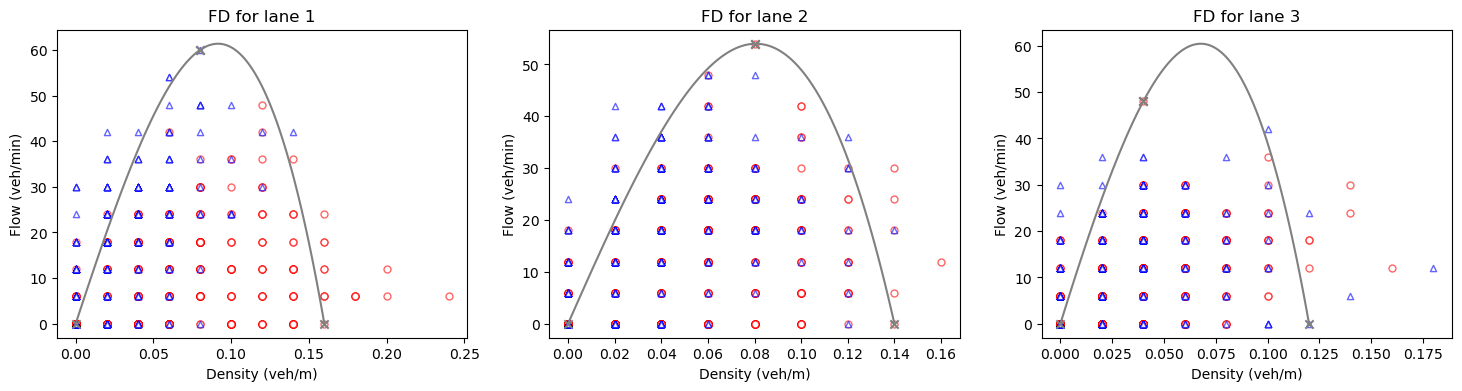

In [20]:
# generate points to draw the curve of the best fit 

fig, ax = plt.subplots(1, 3, figsize=(18, 4))

p_1 = np.poly1d(z_1)
p_2 = np.poly1d(z_2)
p_3 = np.poly1d(z_3)

xp_1 = np.linspace(0, x_points_1[-1], 100)
xp_2 = np.linspace(0, x_points_2[-1], 100)
xp_3 = np.linspace(0, x_points_3[-1], 100)

yp_1 = p_1(xp_1)
yp_2 = p_2(xp_2)
yp_3 = p_3(xp_3)

ax[0].scatter(k_A_1, q_A_1, s=25, marker='o', c='white', edgecolors='red', alpha=0.6, label='Measured at point A')
ax[1].scatter(k_A_2, q_A_2, s=25, marker='o', c='white', edgecolors='red', alpha=0.6, label='Measured at point A')
ax[2].scatter(k_A_3, q_A_3, s=25, marker='o', c='white', edgecolors='red', alpha=0.6, label='Measured at point A')

ax[0].scatter(k_B_1, q_B_1, s=20, marker='^', c='white', edgecolors='blue', alpha=0.6, label='Measured at point B')
ax[1].scatter(k_B_2, q_B_2, s=20, marker='^', c='white', edgecolors='blue', alpha=0.6, label='Measured at point B')
ax[2].scatter(k_B_3, q_B_3, s=20, marker='^', c='white', edgecolors='blue', alpha=0.6, label='Measured at point B')

ax[0].plot(xp_1, yp_1, c='grey')
ax[1].plot(xp_2, yp_2, c='grey')
ax[2].plot(xp_3, yp_3, c='grey')

ax[0].scatter(x_points_1, y_points_1, marker='x', c='grey')
ax[1].scatter(x_points_2, y_points_2, marker='x', c='grey')
ax[2].scatter(x_points_3, y_points_3, marker='x', c='grey')

ax[0].set_xlabel('Density (veh/m)')
ax[1].set_xlabel('Density (veh/m)')
ax[2].set_xlabel('Density (veh/m)')

ax[0].set_ylabel('Flow (veh/min)')
ax[1].set_ylabel('Flow (veh/min)')
ax[2].set_ylabel('Flow (veh/min)')

ax[0].set_title("FD for lane 1")
ax[1].set_title("FD for lane 2")
ax[2].set_title("FD for lane 3")

#plt.savefig('plots/thursday/q_k_poly.jpg', dpi=300)

In [21]:
kjam_1 = xp_1[np.argmax(yp_1)]
kjam_2 = xp_2[np.argmax(yp_2)]
kjam_3 = xp_3[np.argmax(yp_3)]

In [22]:
t_start_1 = 0
t_start_2 = 1800
t_start_3 = 3600
t_start_4 = 5400
t_start_5 = 7200

t_end_1 = 850
t_end_2 = 2600
t_end_3 = 4400
t_end_4 = 6250
t_end_5 = t_max

slots_1 = int((t_end_1 - t_start_1)/dt)
slots_2 = int((t_end_2 - t_start_2)/dt)
slots_3 = int((t_end_3 - t_start_3)/dt)
slots_4 = int((t_end_4 - t_start_4)/dt)
slots_5 = int((t_end_5 - t_start_5)/dt)

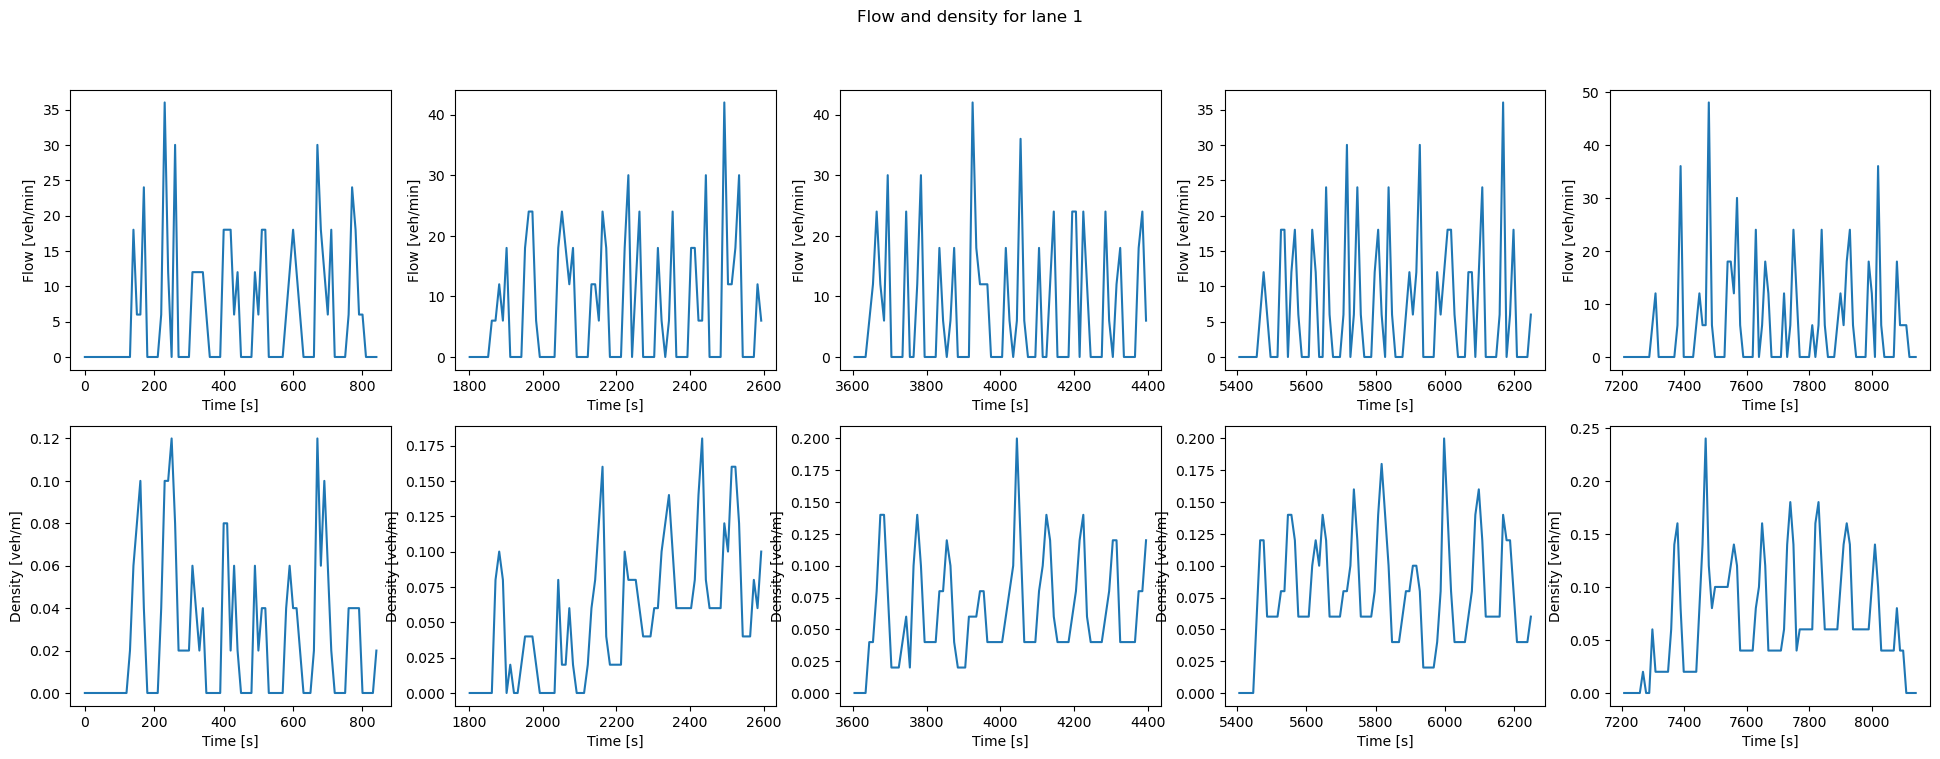

In [23]:
fig, ax = plt.subplots(2, 5, figsize=(24,8))

ax[0,0].plot(all_times[int(t_start_1/dt):int(t_end_1/dt)], q_A_1[int(t_start_1/dt):int(t_end_1/dt)])
ax[0,1].plot(all_times[int(t_start_2/dt):int(t_end_2/dt)], q_A_1[int(t_start_2/dt):int(t_end_2/dt)])
ax[0,2].plot(all_times[int(t_start_3/dt):int(t_end_3/dt)], q_A_1[int(t_start_3/dt):int(t_end_3/dt)])
ax[0,3].plot(all_times[int(t_start_4/dt):int(t_end_4/dt)], q_A_1[int(t_start_4/dt):int(t_end_4/dt)])
ax[0,4].plot(all_times[int(t_start_5/dt):int(t_end_5/dt)], q_A_1[int(t_start_5/dt):int(t_end_5/dt)])

ax[1,0].plot(all_times[int(t_start_1/dt):int(t_end_1/dt)], k_A_1[int(t_start_1/dt):int(t_end_1/dt)])
ax[1,1].plot(all_times[int(t_start_2/dt):int(t_end_2/dt)], k_A_1[int(t_start_2/dt):int(t_end_2/dt)])
ax[1,2].plot(all_times[int(t_start_3/dt):int(t_end_3/dt)], k_A_1[int(t_start_3/dt):int(t_end_3/dt)])
ax[1,3].plot(all_times[int(t_start_4/dt):int(t_end_4/dt)], k_A_1[int(t_start_4/dt):int(t_end_4/dt)])
ax[1,4].plot(all_times[int(t_start_5/dt):int(t_end_5/dt)], k_A_1[int(t_start_5/dt):int(t_end_5/dt)])
                                                                 
fig.suptitle("Flow and density for lane 1")

ax[0,0].set_xlabel("Time [s]")
ax[0,1].set_xlabel("Time [s]")
ax[0,2].set_xlabel("Time [s]")
ax[0,3].set_xlabel("Time [s]")
ax[0,4].set_xlabel("Time [s]")
ax[1,0].set_xlabel("Time [s]")
ax[1,1].set_xlabel("Time [s]")
ax[1,2].set_xlabel("Time [s]")
ax[1,3].set_xlabel("Time [s]")
ax[1,4].set_xlabel("Time [s]")
ax[0,0].set_ylabel("Flow [veh/min]")
ax[0,1].set_ylabel("Flow [veh/min]")
ax[0,2].set_ylabel("Flow [veh/min]")
ax[0,3].set_ylabel("Flow [veh/min]")
ax[0,4].set_ylabel("Flow [veh/min]")
ax[1,0].set_ylabel("Density [veh/m]")
ax[1,1].set_ylabel("Density [veh/m]")
ax[1,2].set_ylabel("Density [veh/m]")
ax[1,3].set_ylabel("Density [veh/m]")
ax[1,4].set_ylabel("Density [veh/m]")
#plt.savefig("plots/thursday/q_k_lane1.jpg", dpi=300)

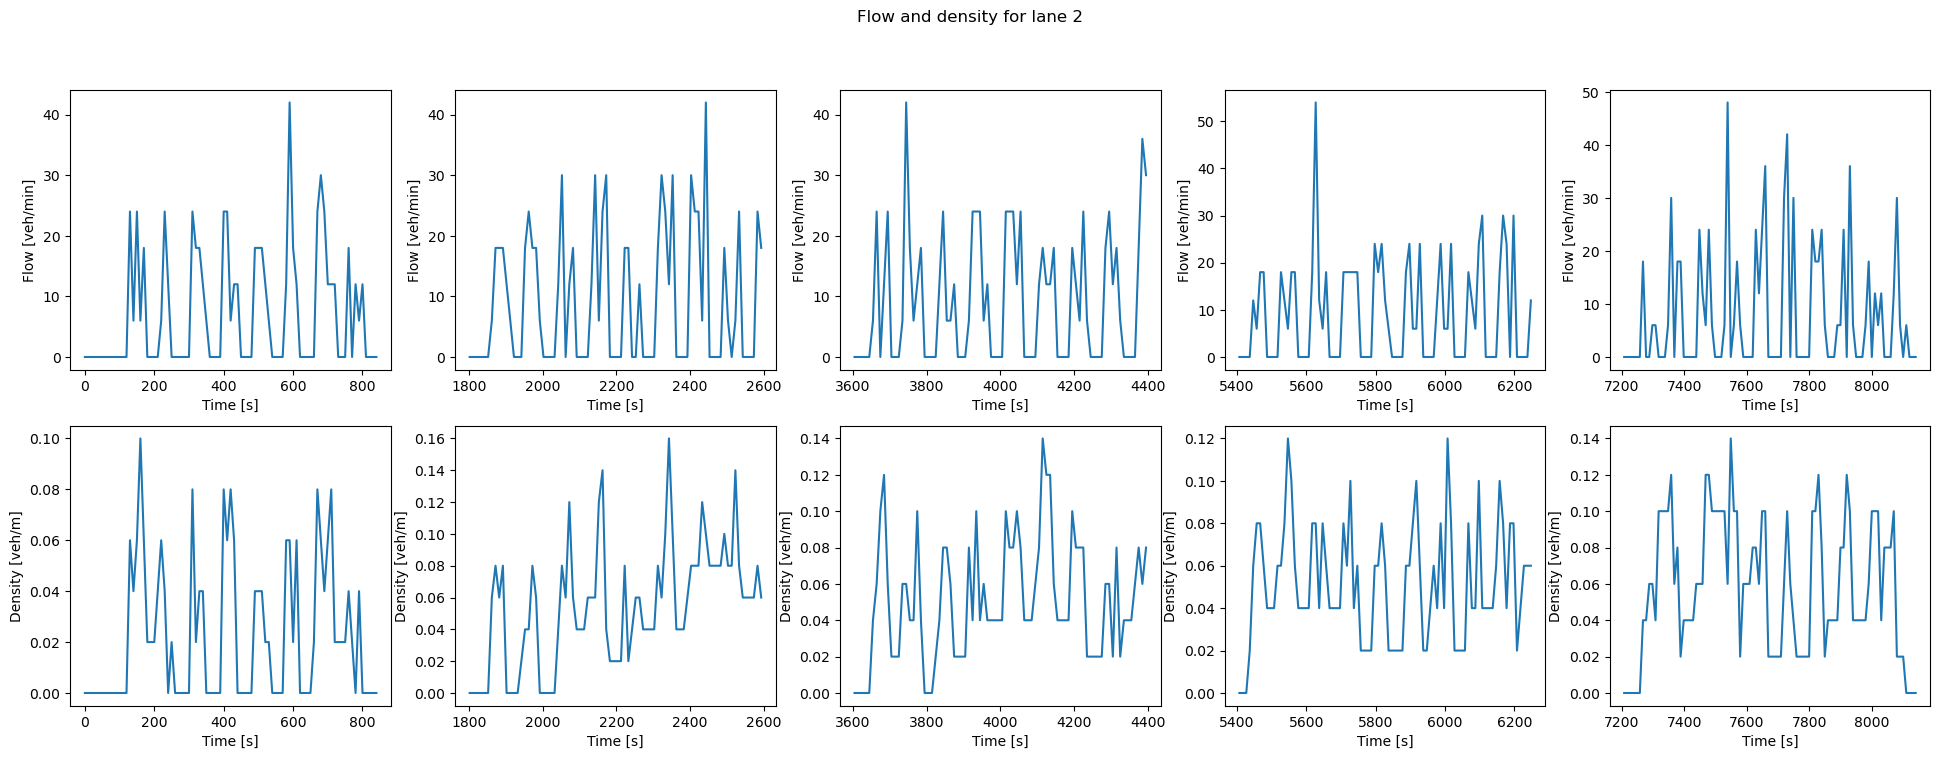

In [24]:
fig, ax = plt.subplots(2, 5, figsize=(24,8))

ax[0,0].plot(all_times[int(t_start_1/dt):int(t_end_1/dt)], q_A_2[int(t_start_1/dt):int(t_end_1/dt)])
ax[0,1].plot(all_times[int(t_start_2/dt):int(t_end_2/dt)], q_A_2[int(t_start_2/dt):int(t_end_2/dt)])
ax[0,2].plot(all_times[int(t_start_3/dt):int(t_end_3/dt)], q_A_2[int(t_start_3/dt):int(t_end_3/dt)])
ax[0,3].plot(all_times[int(t_start_4/dt):int(t_end_4/dt)], q_A_2[int(t_start_4/dt):int(t_end_4/dt)])
ax[0,4].plot(all_times[int(t_start_5/dt):int(t_end_5/dt)], q_A_2[int(t_start_5/dt):int(t_end_5/dt)])

ax[1,0].plot(all_times[int(t_start_1/dt):int(t_end_1/dt)], k_A_2[int(t_start_1/dt):int(t_end_1/dt)])
ax[1,1].plot(all_times[int(t_start_2/dt):int(t_end_2/dt)], k_A_2[int(t_start_2/dt):int(t_end_2/dt)])
ax[1,2].plot(all_times[int(t_start_3/dt):int(t_end_3/dt)], k_A_2[int(t_start_3/dt):int(t_end_3/dt)])
ax[1,3].plot(all_times[int(t_start_4/dt):int(t_end_4/dt)], k_A_2[int(t_start_4/dt):int(t_end_4/dt)])
ax[1,4].plot(all_times[int(t_start_5/dt):int(t_end_5/dt)], k_A_2[int(t_start_5/dt):int(t_end_5/dt)])
                                                                 
fig.suptitle("Flow and density for lane 2")

ax[0,0].set_xlabel("Time [s]")
ax[0,1].set_xlabel("Time [s]")
ax[0,2].set_xlabel("Time [s]")
ax[0,3].set_xlabel("Time [s]")
ax[0,4].set_xlabel("Time [s]")
ax[1,0].set_xlabel("Time [s]")
ax[1,1].set_xlabel("Time [s]")
ax[1,2].set_xlabel("Time [s]")
ax[1,3].set_xlabel("Time [s]")
ax[1,4].set_xlabel("Time [s]")
ax[0,0].set_ylabel("Flow [veh/min]")
ax[0,1].set_ylabel("Flow [veh/min]")
ax[0,2].set_ylabel("Flow [veh/min]")
ax[0,3].set_ylabel("Flow [veh/min]")
ax[0,4].set_ylabel("Flow [veh/min]")
ax[1,0].set_ylabel("Density [veh/m]")
ax[1,1].set_ylabel("Density [veh/m]")
ax[1,2].set_ylabel("Density [veh/m]")
ax[1,3].set_ylabel("Density [veh/m]")
ax[1,4].set_ylabel("Density [veh/m]")
#plt.savefig("plots/thursday/q_k_lane2.jpg", dpi=300)

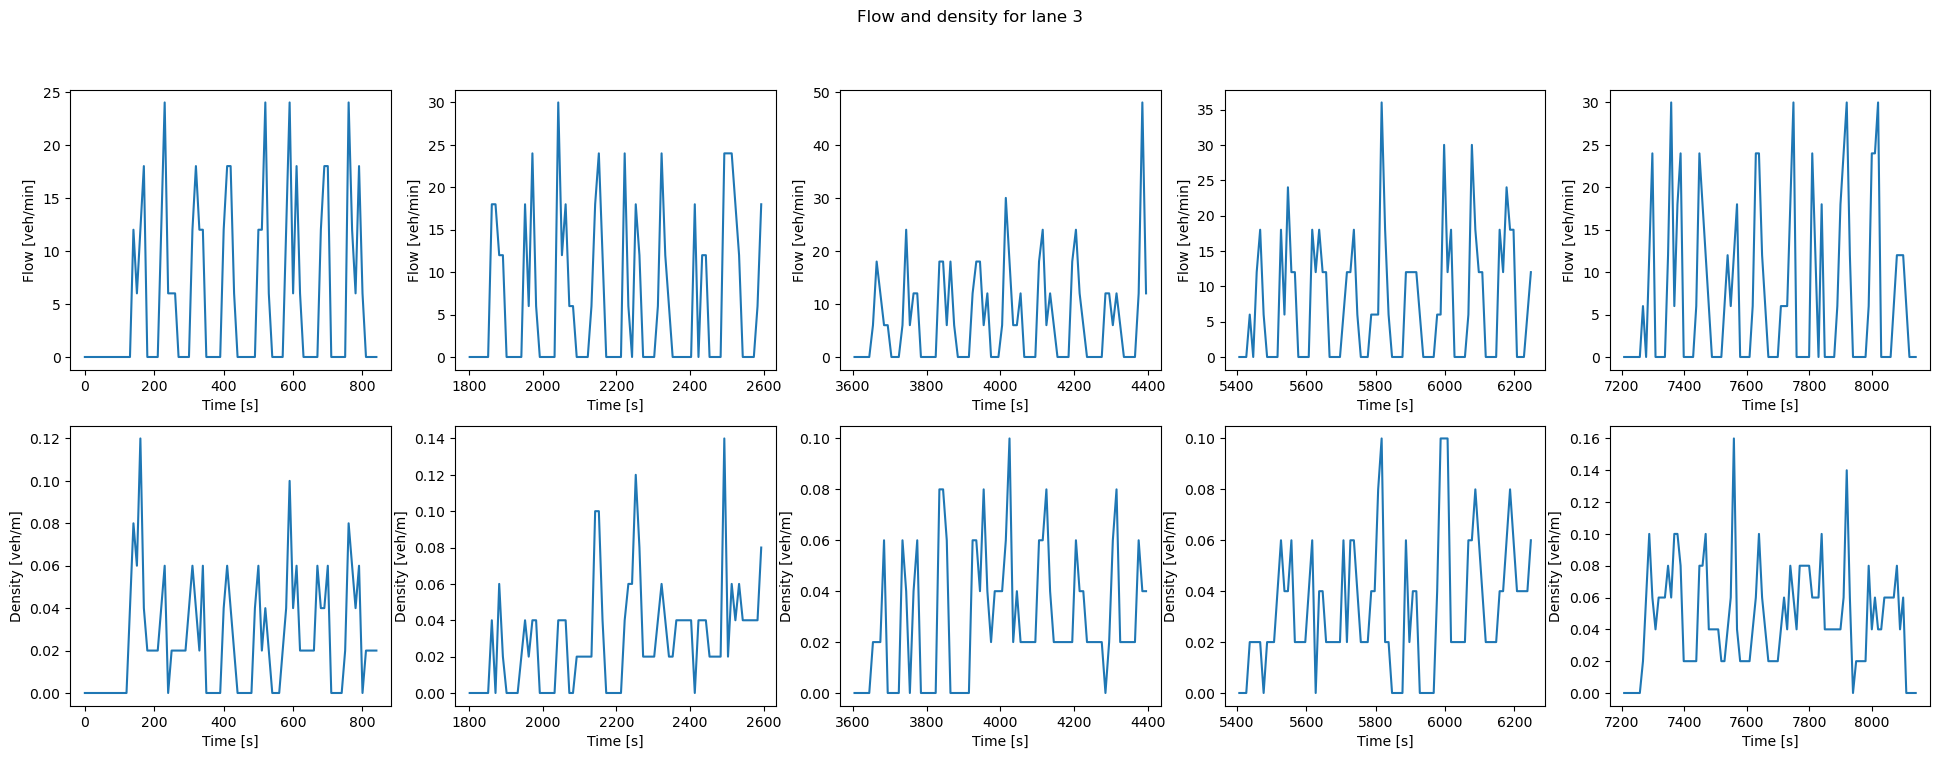

In [25]:
fig, ax = plt.subplots(2, 5, figsize=(24,8))

ax[0,0].plot(all_times[int(t_start_1/dt):int(t_end_1/dt)], q_A_3[int(t_start_1/dt):int(t_end_1/dt)])
ax[0,1].plot(all_times[int(t_start_2/dt):int(t_end_2/dt)], q_A_3[int(t_start_2/dt):int(t_end_2/dt)])
ax[0,2].plot(all_times[int(t_start_3/dt):int(t_end_3/dt)], q_A_3[int(t_start_3/dt):int(t_end_3/dt)])
ax[0,3].plot(all_times[int(t_start_4/dt):int(t_end_4/dt)], q_A_3[int(t_start_4/dt):int(t_end_4/dt)])
ax[0,4].plot(all_times[int(t_start_5/dt):int(t_end_5/dt)], q_A_3[int(t_start_5/dt):int(t_end_5/dt)])

ax[1,0].plot(all_times[int(t_start_1/dt):int(t_end_1/dt)], k_A_3[int(t_start_1/dt):int(t_end_1/dt)])
ax[1,1].plot(all_times[int(t_start_2/dt):int(t_end_2/dt)], k_A_3[int(t_start_2/dt):int(t_end_2/dt)])
ax[1,2].plot(all_times[int(t_start_3/dt):int(t_end_3/dt)], k_A_3[int(t_start_3/dt):int(t_end_3/dt)])
ax[1,3].plot(all_times[int(t_start_4/dt):int(t_end_4/dt)], k_A_3[int(t_start_4/dt):int(t_end_4/dt)])
ax[1,4].plot(all_times[int(t_start_5/dt):int(t_end_5/dt)], k_A_3[int(t_start_5/dt):int(t_end_5/dt)])
                                                                 
fig.suptitle("Flow and density for lane 3")

ax[0,0].set_xlabel("Time [s]")
ax[0,1].set_xlabel("Time [s]")
ax[0,2].set_xlabel("Time [s]")
ax[0,3].set_xlabel("Time [s]")
ax[0,4].set_xlabel("Time [s]")
ax[1,0].set_xlabel("Time [s]")
ax[1,1].set_xlabel("Time [s]")
ax[1,2].set_xlabel("Time [s]")
ax[1,3].set_xlabel("Time [s]")
ax[1,4].set_xlabel("Time [s]")
ax[0,0].set_ylabel("Flow [veh/min]")
ax[0,1].set_ylabel("Flow [veh/min]")
ax[0,2].set_ylabel("Flow [veh/min]")
ax[0,3].set_ylabel("Flow [veh/min]")
ax[0,4].set_ylabel("Flow [veh/min]")
ax[1,0].set_ylabel("Density [veh/m]")
ax[1,1].set_ylabel("Density [veh/m]")
ax[1,2].set_ylabel("Density [veh/m]")
ax[1,3].set_ylabel("Density [veh/m]")
ax[1,4].set_ylabel("Density [veh/m]")
#plt.savefig("plots/thursday/q_k_lane3.jpg", dpi=300)

In [26]:
congestion_data = np.zeros((num_of_files, 11)) #entry time, entry lane, q, k, 0 or 1
for i in range(num_of_files):
    lanes = all_info_measured[i][:,-1]
    entry_lane = int(lanes[0][7:8])
    entry_time = all_info_measured[i][0][5]
    congestion_data[i, 0] = entry_time
    congestion_data[i, 1] = entry_lane

    q_1 = (q_A_1[int(entry_time/dt)] + q_B_1[int(entry_time/dt)])/2 
    q_2 = (q_A_2[int(entry_time/dt)] + q_B_2[int(entry_time/dt)])/2
    q_3 = (q_A_3[int(entry_time/dt)] + q_B_3[int(entry_time/dt)])/2
    k_1 = (k_A_1[int(entry_time/dt)] + k_B_1[int(entry_time/dt)])/2
    k_2 = (k_A_2[int(entry_time/dt)] + k_B_2[int(entry_time/dt)])/2
    k_3 = (k_A_3[int(entry_time/dt)] + k_B_3[int(entry_time/dt)])/2
   

    congestion_data[i, 2] = q_1
    congestion_data[i, 3] = k_1
    congestion_data[i, 5] = q_2
    congestion_data[i, 6] = k_2
    congestion_data[i, 8] = q_3
    congestion_data[i, 9] = k_3
    
    
    if k_1 > kjam_1 :
        congestion_data[i, 4] = 1
    elif k_2 > kjam_2:
        congestion_data[i, 7] = 1
    elif k_3 > kjam_3:
        congestion_data[i, 10] = 1
    

In [27]:
#sanity check
for i in range(congestion_data.shape[0]):
    if congestion_data[i,3] == 0 and congestion_data[i, 4]==1:
        raise TypeError("Density is 0 but the conditions are described as congested")
    elif congestion_data[i,6] == 0 and congestion_data[i, 7]==1:
        raise TypeError("Density is 0 but the conditions are described as congested")
    elif congestion_data[i,9] == 0 and congestion_data[i, 10]==1:
        raise TypeError("Density is 0 but the conditions are described as congested")

In [28]:
results = pd.DataFrame(congestion_data, columns=["Entry time [s]", "Entry lane", "Flow 1 [veh/min]", "Density 1 [veh/m]", "Congestion index 1", "Flow 2 [veh/min]", "Density 2 [veh/m]", "Congestion index 2", "Flow 3 [veh/min]", "Density 3 [veh/m]", "Congestion index 3"])

In [29]:
results.iloc[1240:1250, :]

,Entry time [s],Entry lane,Flow 1 [veh/min],Density 1 [veh/m],Congestion index 1,Flow 2 [veh/min],Density 2 [veh/m],Congestion index 2,Flow 3 [veh/min],Density 3 [veh/m],Congestion index 3
1240,4029.00,1.0,18.0,0.07,0.0,24.0,0.07,0.0,15.0,0.05,0.0
1241,4030.80,2.0,15.0,0.06,0.0,27.0,0.06,0.0,9.0,0.01,0.0
1242,4063.56,2.0,3.0,0.02,0.0,0.0,0.02,0.0,0.0,0.01,0.0
1243,4065.04,1.0,3.0,0.02,0.0,0.0,0.02,0.0,0.0,0.01,0.0
1244,4065.76,2.0,3.0,0.02,0.0,0.0,0.02,0.0,0.0,0.01,0.0
1245,4069.40,2.0,3.0,0.02,0.0,0.0,0.02,0.0,0.0,0.01,0.0
1246,4061.92,3.0,3.0,0.02,0.0,0.0,0.02,0.0,0.0,0.01,0.0
1247,4072.20,2.0,0.0,0.02,0.0,0.0,0.04,0.0,0.0,0.01,0.0
1248,4076.72,1.0,0.0,0.02,0.0,0.0,0.04,0.0,0.0,0.01,0.0
1249,4073.20,2.0,0.0,0.02,0.0,0.0,0.04,0.0,0.0,0.01,0.0


In [30]:
results.shape

(2514, 11)

In [31]:
#results.to_csv("input_files/congestion_results_thursday.csv")